In [1]:
from batch import BatchResult
import pandas as pd
batch_params = {
    "N": [98],
    "province": ["Ontario"],
    "random_seed": range(0,7),
    "n_segregation_steps": [41],
    "global_util_thresh": [0.1],
    "price_weight_mode": [0.3],
    "ts_step_length": ["w"],
    "start_year": 2020,
    "refurbishment_rate": 0.03,
    "hp_subsidy": 0.1,
    "fossil_ban_year": 2030
}

res = BatchResult.from_parameters(batch_params, max_steps=100)


results_dir=WindowsPath('c:/src/canadopt/abetam/results/subsidy_tracking/cf9996b118872824660e1c5ff5cd263a') does not exist. Running model.


100%|██████████| 7/7 [00:21<00:00,  3.04s/it]


# Calculation of subsidies

Total amount of subsidies $T^S$

$$
T^S = \sum_y N^p_y * s * P_y 
$$
with 
* Purchase price at year $y$: $P_y$
* subsidy fraction $s$
* amount of purchases in a year $N^p_y$

where $P_y = C_{y,i} * \dot{D}$ 

In [6]:
(res.tech_shares_df.set_index(["RunId","province","year"]).sum(axis=1)*100 - 100.0 > 1e-6).sum()

0

In [3]:
res.results_df.columns
# ['RunId', 'iteration', 'Step', 'N', 'province', 'random_seed',
#        'n_segregation_steps', 'global_util_thresh', 'price_weight_mode',
#        'ts_step_length', 'start_year', 'refurbishment_rate', 'hp_subsidy',
#        'fossil_ban_year', 'Technology shares', 'Energy demand time series',
#        'AgentID', 'Attitudes', 'Adoption details', 'Appliance age',
#        'Appliance name', 'Technology annual_cost', 'Heat pump specific_cost',
#        'Refurbished', 'Required heating size', 'year','Heat demand']

Index(['RunId', 'iteration', 'Step', 'N', 'province', 'random_seed',
       'n_segregation_steps', 'global_util_thresh', 'price_weight_mode',
       'ts_step_length', 'start_year', 'refurbishment_rate', 'hp_subsidy',
       'fossil_ban_year', 'Technology shares', 'Energy demand time series',
       'AgentID', 'Attitudes', 'Appliance age', 'Appliance name',
       'Technology annual_cost', 'Heat pump specific_cost', 'Refurbished',
       'Required heating size', 'Heat demand', 'year'],
      dtype='object')

In [2]:
res.adoption_details_df

,year,RunId,AgentID,tech,annual_costs,purchase_price,amount,cumulative_amount
0,2020.25,0,28,Electric furnace,1.308026e+08,87.683,1,1
1,2020.25,1,19,Electric furnace,2.910253e+08,87.683,1,1
2,2020.25,1,36,Electric furnace,1.196623e+08,87.683,1,2
3,2020.25,1,43,Gas furnace,4.157864e+07,183.115,1,1
4,2020.25,1,93,Gas furnace,4.389190e+07,183.115,1,2
...,...,...,...,...,...,...,...,...
876,2045.00,1,38,Electric furnace,1.028973e+08,87.683,1,48
877,2045.00,1,81,Electric furnace,9.799252e+07,87.683,1,49
878,2045.00,4,66,Electric furnace,1.588224e+08,87.683,1,45
879,2045.00,5,9,Electric furnace,2.230488e+08,87.683,1,44


In [14]:
import plotly.express as px
adopt_df = res.adoption_details_df.set_index(["year", "RunId", "AgentID"])
heat_dem = res.results_df.set_index(["year", "RunId", "AgentID"])[["Heat demand"]]
adopt_df["Heat demand (kWh)"] = heat_dem.loc[adopt_df.index,"Heat demand"]
adopt_df["LCOH (CAD/kWh)"] = adopt_df["annual_costs"] / adopt_df["Heat demand (kWh)"]

px.scatter(adopt_df.reset_index(), x="year", y="LCOH (CAD/kWh)", color="tech", template="plotly")

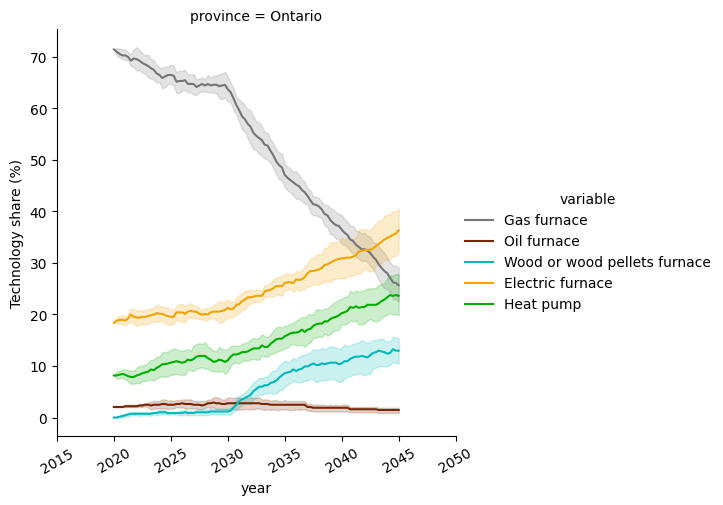

In [15]:
res.tech_shares_fig()

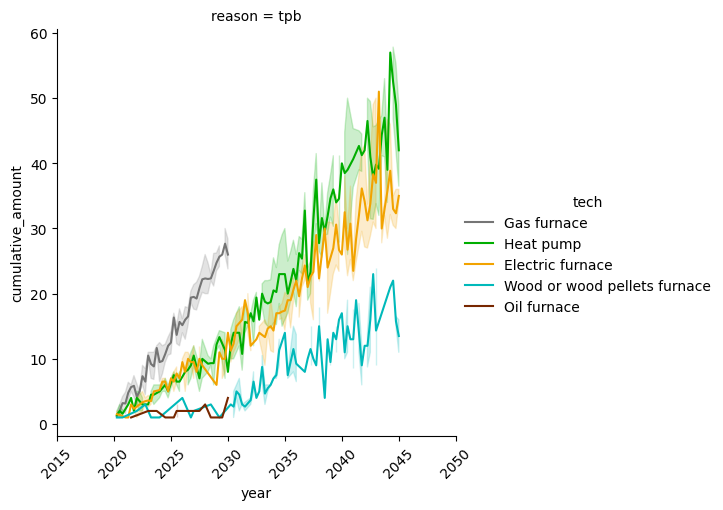

In [9]:
res.adoption_details_fig()

c:\src\canadopt\abetam\batch.py:664: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45)


<Axes: xlabel='year', ylabel='Appliance age'>

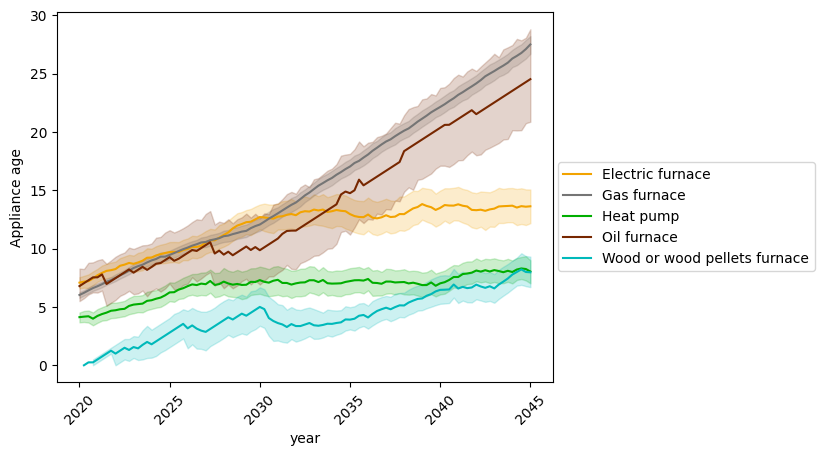

In [10]:
res.appliance_age_fig()

In [6]:
# res.adoption_details_df.groupby(["year","tech"])["amount"].sum().reset_index().pivot(columns="tech", index="year").fillna(0).plot()

In [19]:
if not res.path.exists():
    res.save()

# Calculation of emissions


In [8]:
res.emissions().head()

,Fuels.ELECTRICITY,Fuels.HEATING_OIL,Fuels.NATURAL_GAS,Fuels.WOOD_OR_WOOD_PELLETS
2020,0.454759,1.449743,18.466009,0.000000
2021,0.456322,1.451420,17.941902,0.024764
2022,0.457885,1.453096,17.417794,0.049528
2023,0.459449,1.454773,16.893686,0.074292
2024,0.461012,1.456449,16.369578,0.099056


In [9]:
import plotly.express as px

fig = px.line(res.emissions().cumsum(), template="plotly")
fig.update_layout(yaxis_title="CO2 Emissions (Mt)", width=500)

In [10]:
res.results_df["Energy demand time series"]

0        {'Fuels.NATURAL_GAS': [2769763328.0, 243785190...
1        {'Fuels.NATURAL_GAS': [2769763328.0, 243785190...
2        {'Fuels.NATURAL_GAS': [2769763328.0, 243785190...
3        {'Fuels.NATURAL_GAS': [2769763328.0, 243785190...
4        {'Fuels.NATURAL_GAS': [2769763328.0, 243785190...
                               ...                        
70695    {'Fuels.NATURAL_GAS': [1015288704.0, 893622656...
70696    {'Fuels.NATURAL_GAS': [1015288704.0, 893622656...
70697    {'Fuels.NATURAL_GAS': [1015288704.0, 893622656...
70698    {'Fuels.NATURAL_GAS': [1015288704.0, 893622656...
70699    {'Fuels.NATURAL_GAS': [1015288704.0, 893622656...
Name: Energy demand time series, Length: 70700, dtype: object